In [439]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [440]:
# df = pd.read_csv("../hasil_ekstraksi_rata2_rgb.csv")
df = pd.read_csv("../hasil_ekstraksi_rata2_hsv.csv")
# df = pd.read_csv("../hasil_ekstraksi_rata2RGB_glcm.csv")
# df = pd.read_csv("../hasil_ekstraksi_orde1_glcm1.csv")
# df = pd.read_csv("../hasil_ekstraksi_orde1_glcm.csv")
df

,label,H,S,V
0,1,81.974577,102.584973,168.376517
1,1,54.737978,91.916578,146.841428
2,1,76.855214,96.200118,160.534384
3,1,76.855214,96.200118,160.534384
4,1,33.478151,103.161639,147.159878
...,...,...,...,...
215,5,83.991077,82.608059,155.094844
216,5,83.991077,82.608059,155.094844
217,5,86.196517,71.111233,170.544318
218,5,86.196517,71.111233,170.544318


In [441]:
X = df.drop(columns="label")
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((176, 3), (44, 3), (176,), (44,))

In [442]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# scaler.fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [443]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [444]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train_scaled, y_train)


GaussianNB()

In [445]:
predictions = model.predict(X_test_scaled)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           1       1.00      0.67      0.80         6
           2       1.00      1.00      1.00         7
           3       0.69      0.69      0.69        13
           4       0.36      0.44      0.40         9
           5       0.44      0.44      0.44         9

    accuracy                           0.64        44
   macro avg       0.70      0.65      0.67        44
weighted avg       0.67      0.64      0.65        44



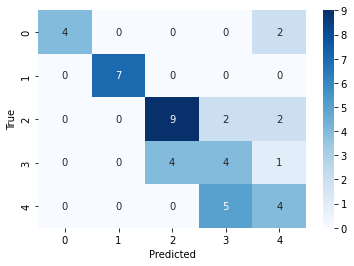

In [446]:
import seaborn as sns
import matplotlib.pyplot as plt

# menghitung confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()